In [637]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, spearmanr, skew, kurtosis
import numpy as np

In [638]:
# Load the csv file
real_df = pd.read_csv("NYC TLC Trip Record.csv")

# Backup df
df = real_df.copy()

# Display the first few rows of the DataFrame
df.head()


C:\Users\User\AppData\Local\Temp\ipykernel_24968\1721073245.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  real_df = pd.read_csv("NYC TLC Trip Record.csv")


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


In [639]:
# Display basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [640]:
# Rename columns to conform to PEP8 standards
df = df.rename(columns={
    "VendorID": "vendor_id",
    "tpep_pickup_datetime": "pickup_datetime",
    "tpep_dropoff_datetime": "dropoff_datetime",
    "passenger_count": "passenger_count",
    "trip_distance": "trip_distance",
    "RatecodeID": "rate_code_id",
    "store_and_fwd_flag": "store_and_fwd_flag",
    "PULocationID": "pickup_location_id",
    "DOLocationID": "dropoff_location_id",
    "payment_type": "payment_type",
    "fare_amount": "fare_amount",
    "extra": "extra",
    "mta_tax": "mta_tax",
    "tip_amount": "tip_amount",
    "tolls_amount": "tolls_amount",
    "improvement_surcharge": "improvement_surcharge",
    "total_amount": "total_amount",
    "congestion_surcharge": "congestion_surcharge",
    "Trip_type": "trip_type"
})


In [641]:
df.head()

,vendor_id,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_code_id,pickup_location_id,dropoff_location_id,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


In [642]:
# Display summary statistics
df.describe()

,vendor_id,rate_code_id,pickup_location_id,dropoff_location_id,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


In [643]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   vendor_id              68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   rate_code_id           63887 non-null  float64
 5   pickup_location_id     68211 non-null  int64  
 6   dropoff_location_id    68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [644]:
df.isnull().sum()

vendor_id                    0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
rate_code_id              4324
pickup_location_id           0
dropoff_location_id          0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

In [645]:
# Treat NA rows

In [646]:
# MCAR
df = df.drop(columns=["ehail_fee"])

In [647]:
# MAR
for column in ["store_and_fwd_flag", "rate_code_id", "payment_type"]:
    df[column] = df[column].fillna(df[column].mode()[0])

for column in ["passenger_count", "congestion_surcharge"]:
    df[column] = df[column].fillna(df[column].median())

In [648]:
# MNAR
mnar = ["trip_type"]
df["trip_type"] = df["trip_type"].fillna(df["trip_type"].mode()[0])

In [649]:
df.isnull().sum()

vendor_id                0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
rate_code_id             0
pickup_location_id       0
dropoff_location_id      0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

In [650]:
# Check for duplicate rows
df.duplicated().sum()

0

In [651]:
# Convert datetime columns to datetime type
for column in ["lpep_pickup_datetime", "lpep_dropoff_datetime"]:
    df[column] = pd.to_datetime(df[column])

In [652]:
# Convert categorical columns to category type
for column in ["vendor_id", "store_and_fwd_flag", "rate_code_id", "payment_type", "trip_type", "pickup_location_id", "dropoff_location_id"]:
    df[column] = df[column].astype("category")

In [653]:
# Calculate trip duration in minutes
df["trip_duration"] = round((df["lpep_dropoff_datetime"] - df["lpep_pickup_datetime"]).dt.total_seconds() / 60, 2)

In [654]:
# Extract hour, day of week, and month from pickup datetime
df["pickup_hour"] = df["lpep_pickup_datetime"].dt.hour
df["pickup_day_of_week"] = df["lpep_pickup_datetime"].dt.dayofweek
df["pickup_month"] = df["lpep_pickup_datetime"].dt.month

In [655]:
# Map VendorID to vendor_name
vendor_mapping = {
    1: "Creative Mobile Technologies, LLC.",
    2: "VeriFone Inc."
}
df["vendor_name"] = df["vendor_id"].map(vendor_mapping)

In [656]:
# Map RatecodeID to rate_code_id
rate_code_mapping = {
    1: "Standard Rate",
    2: "JFK",
    3: "Newark",
    4: "Nassau or Westchester",
    5: "Negotiated Fare",
    6: "Group Ride",
    0: "Unknown",
    99: "Unknown"
}
df["rate_code_name"] = df["rate_code_id"].map(rate_code_mapping)

In [657]:
# Map store_and_fwd_flag to store_and_fwd_flag
store_and_fwd_mapping = {
    "Y": "Store and Forward Trip",
    "N": "Not A Store and Forward Trip",
    0 : "Unknown"
}
df["store_and_fwd_flag_name"] = df["store_and_fwd_flag"].map(store_and_fwd_mapping)

In [658]:
# Map Payment_type to payment_type
payment_type_mapping = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided Trip",
    0: "Unkown"
}
df["payment_type_name"] = df["payment_type"].map(payment_type_mapping)

In [659]:
# Map Trip_type to trip_type
trip_type_mapping = {
    1: "Street-hail",
    2: "Dispatch",
    0: "Unknown"
}
df["trip_type_name"] = df["trip_type"].map(trip_type_mapping)

In [660]:
df.head()

,vendor_id,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_code_id,pickup_location_id,dropoff_location_id,passenger_count,trip_distance,fare_amount,...,congestion_surcharge,trip_duration,pickup_hour,pickup_day_of_week,pickup_month,vendor_name,rate_code_name,store_and_fwd_flag_name,payment_type_name,trip_type_name
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,2.75,11.02,0,6,1,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,0.00,6.77,0,6,1,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,0.00,6.33,0,6,1,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,0.00,5.82,0,6,1,"Creative Mobile Technologies, LLC.",Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,0.00,5.97,0,6,1,"Creative Mobile Technologies, LLC.",Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail


In [661]:
for column in ["rate_code_id", "passenger_count"]:
    df[column] = df[column].apply(lambda x: int(x))

In [662]:
df.head()

,vendor_id,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_code_id,pickup_location_id,dropoff_location_id,passenger_count,trip_distance,fare_amount,...,congestion_surcharge,trip_duration,pickup_hour,pickup_day_of_week,pickup_month,vendor_name,rate_code_name,store_and_fwd_flag_name,payment_type_name,trip_type_name
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1,166,143,1,2.58,14.9,...,2.75,11.02,0,6,1,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1,24,43,1,1.81,10.7,...,0.00,6.77,0,6,1,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1,223,179,1,0.00,7.2,...,0.00,6.33,0,6,1,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1,41,238,1,1.30,6.5,...,0.00,5.82,0,6,1,"Creative Mobile Technologies, LLC.",Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1,41,74,1,1.10,6.0,...,0.00,5.97,0,6,1,"Creative Mobile Technologies, LLC.",Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail


In [663]:
df = df.sort_values(by="lpep_pickup_datetime", ascending=True)

In [664]:
df.to_csv("NYC TLC Trip Record - Clean.csv", index=False, sep = ";")

In [665]:
df.describe()

,lpep_pickup_datetime,lpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration,pickup_hour,pickup_day_of_week,pickup_month
count,68211,68211,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000
mean,2023-01-16 20:10:55.679524096,2023-01-16 20:29:01.515767040,1.295847,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,0.951625,21.789377,0.680678,18.097274,13.814707,2.848749,1.000337
min,2009-01-01 20:21:27,2009-01-02 11:07:31,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,-1.000000,-71.500000,-2.750000,0.000000,0.000000,0.000000,1.000000
25%,2023-01-09 11:59:47.500000,2023-01-09 12:16:37.500000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.900000,0.000000,7.220000,10.000000,1.000000,1.000000
50%,2023-01-17 08:40:42,2023-01-17 08:56:38,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,1.000000,17.900000,0.000000,11.400000,14.000000,3.000000,1.000000
75%,2023-01-24 15:52:30,2023-01-24 16:06:56,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,1.000000,26.150000,0.000000,17.480000,18.000000,4.000000,1.000000
max,2023-02-01 03:10:05,2023-02-01 17:27:05,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000,2.750000,1439.880000,23.000000,6.000000,12.000000
std,NaN,NaN,0.950635,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,0.196875,15.457115,1.187047,74.925634,5.230998,1.961776,0.059686


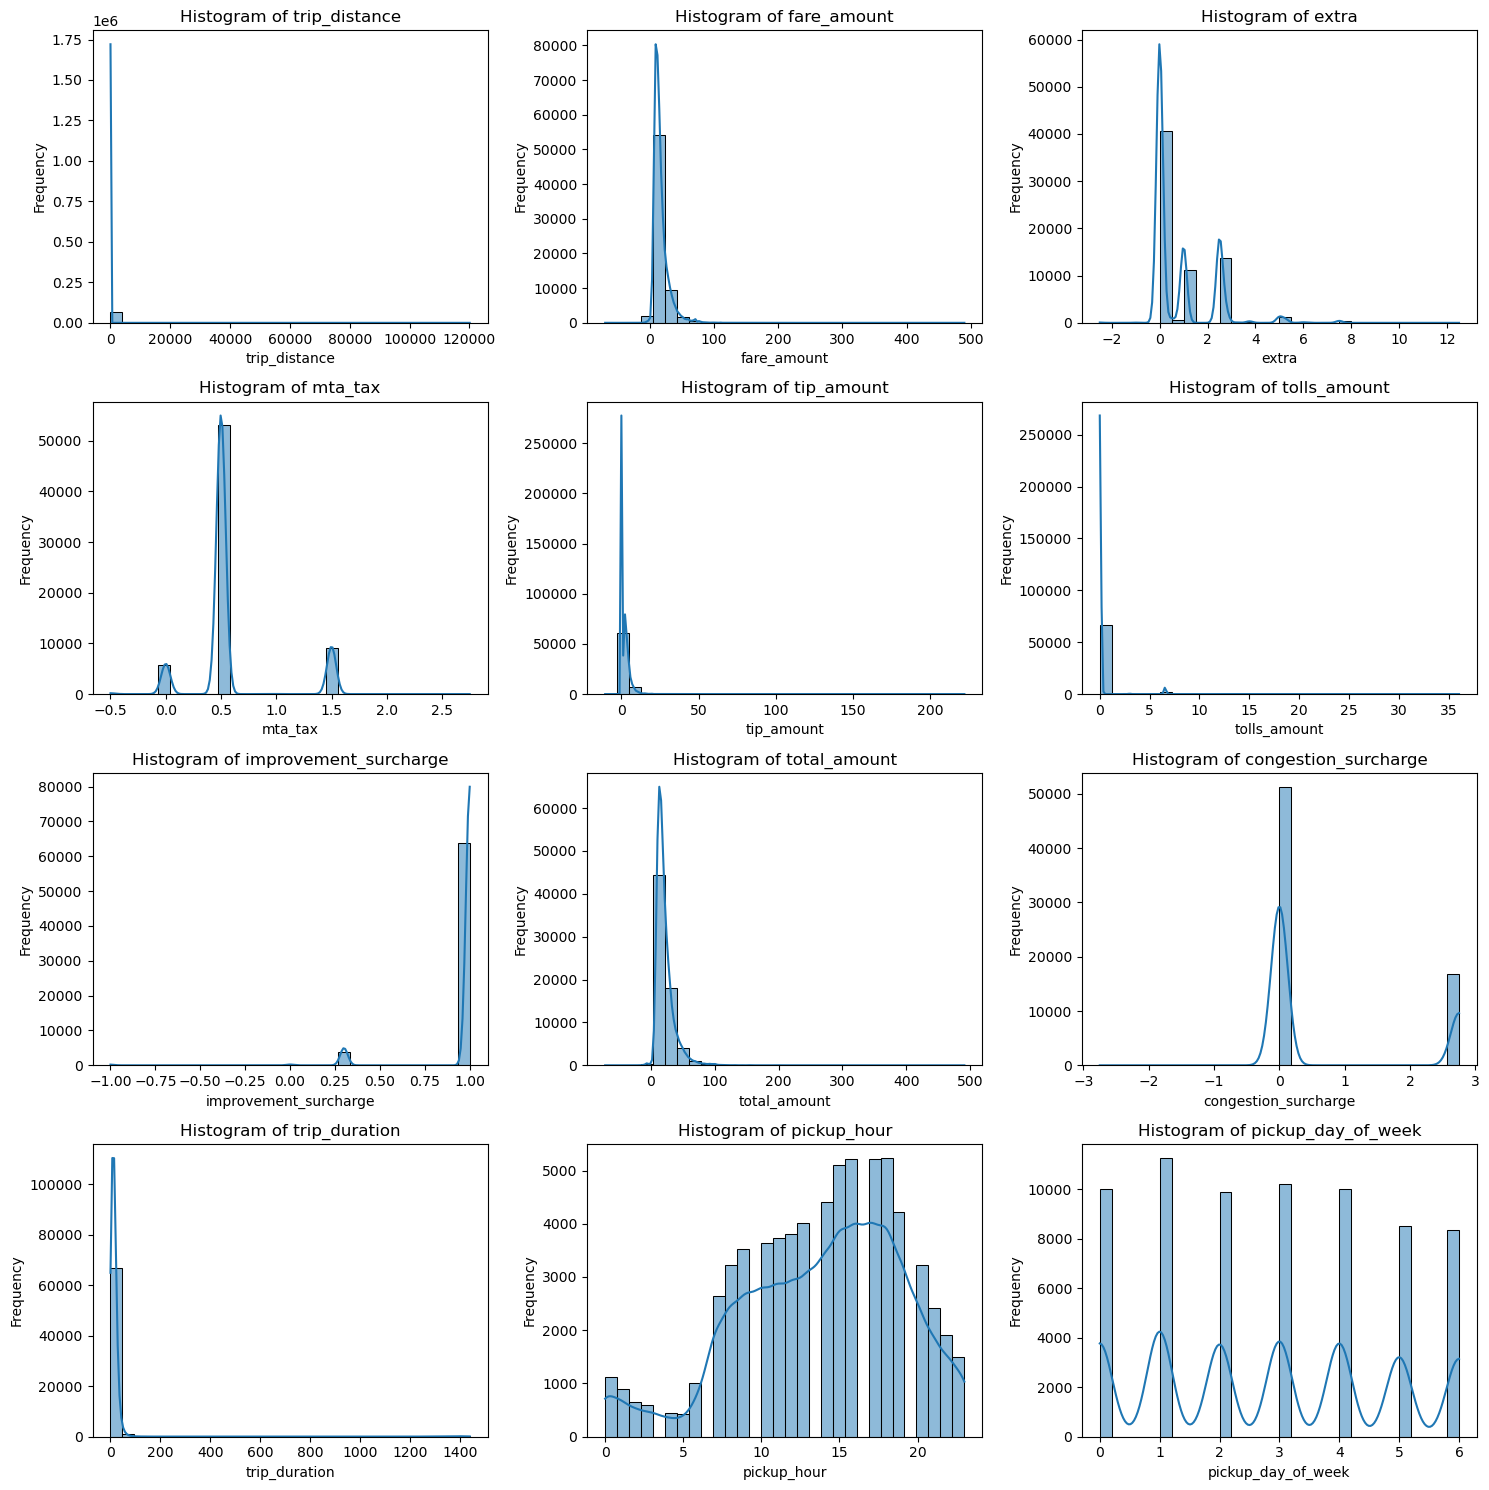

In [666]:
# List of columns to plot
columns = [
    'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
    'tolls_amount', 'improvement_surcharge', 'total_amount',
    'congestion_surcharge', 'trip_duration', 'pickup_hour',
    'pickup_day_of_week', 'pickup_month'
]

# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

# Loop through each column and create a histogram
for ax, column in zip(axes, columns):
    sns.histplot(df[column], bins=30, kde=True, ax=ax)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()  # Adjust layout
plt.show()  # Show the plot

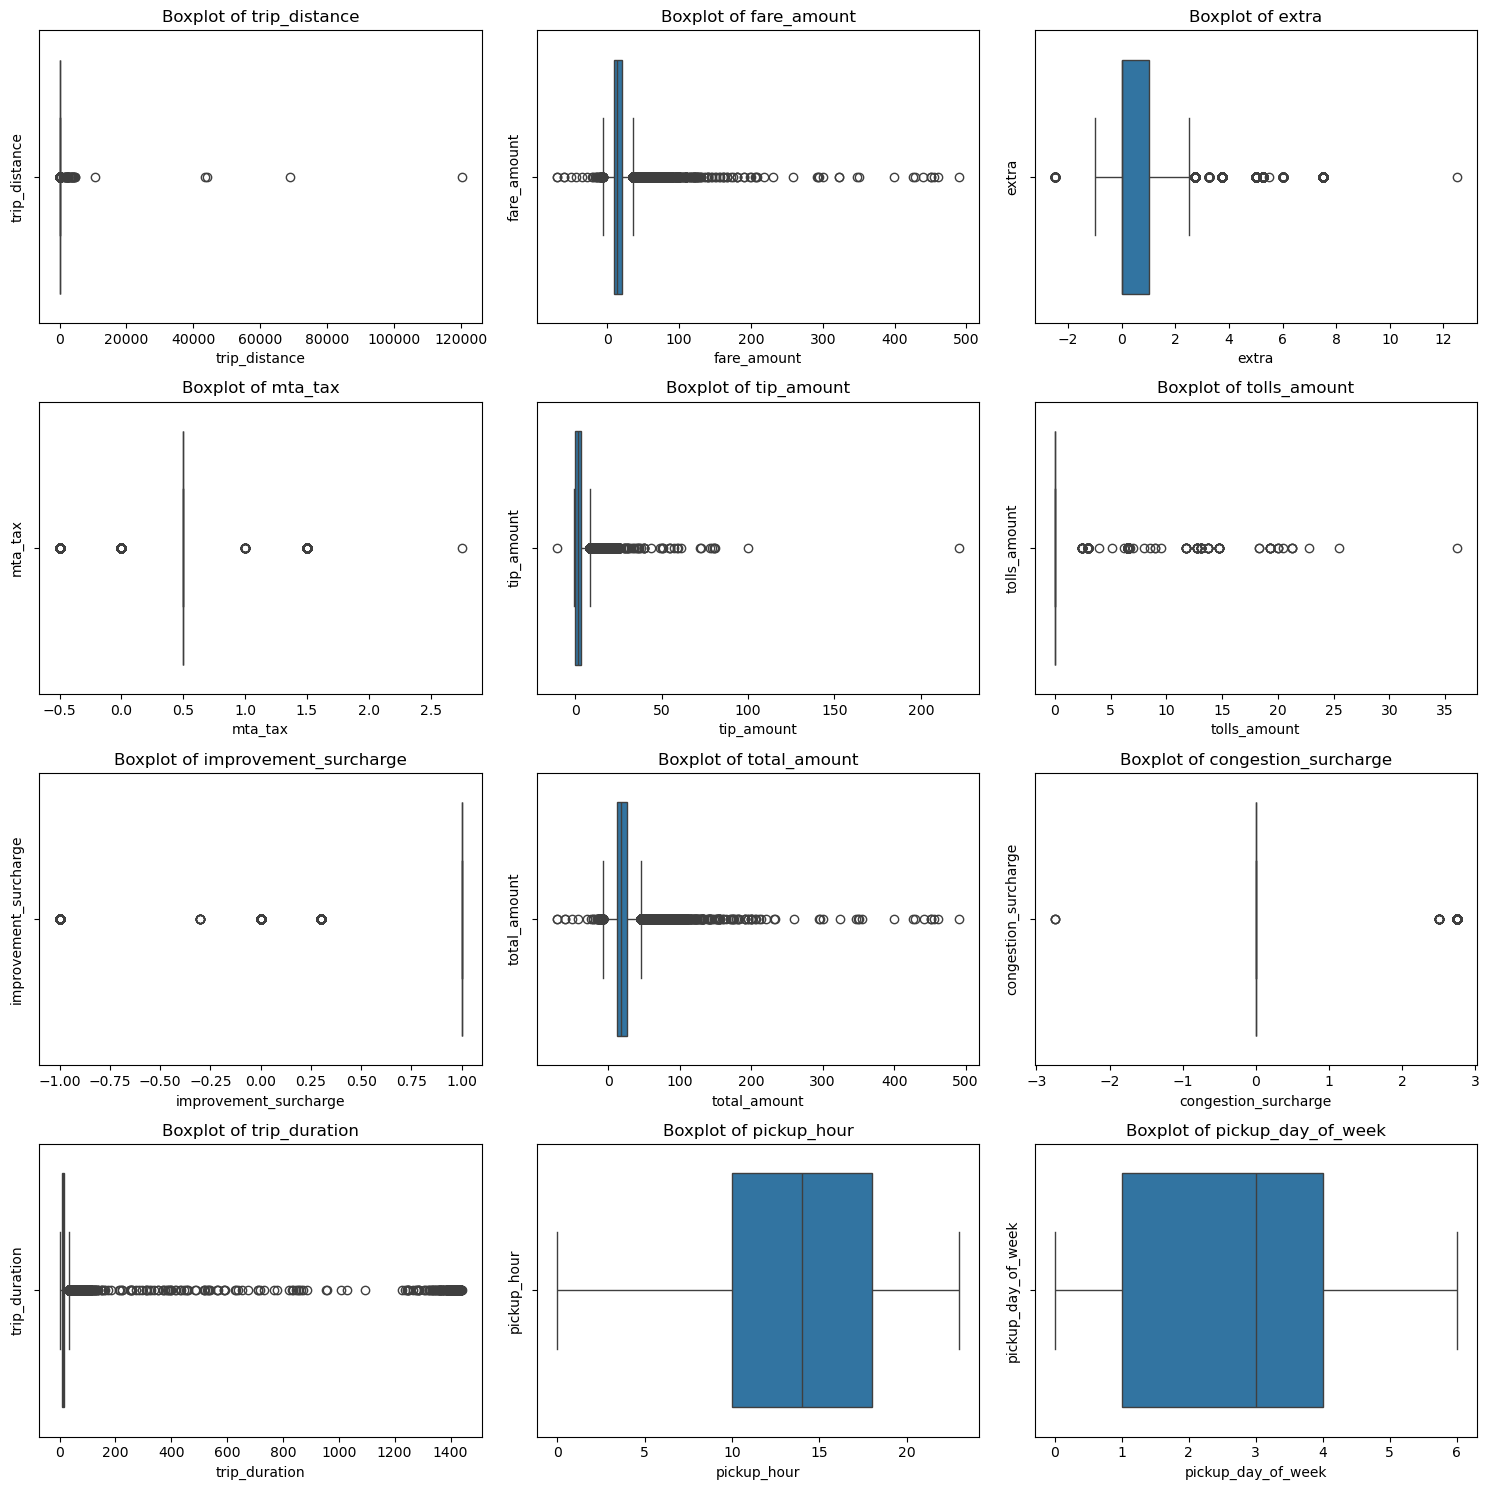

In [667]:
# List of columns to plot
columns = [
    'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
    'tolls_amount', 'improvement_surcharge', 'total_amount',
    'congestion_surcharge', 'trip_duration', 'pickup_hour',
    'pickup_day_of_week', 'pickup_month'
]

# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

# Loop through each column and create a boxplot
for ax, column in zip(axes, columns):
    sns.boxplot(df[column], ax=ax, orient="h")
    ax.set_title(f'Boxplot of {column}')
    ax.set_ylabel(column)

plt.tight_layout()  # Adjust layout
plt.show()  # Show the plot


In [668]:
results = []
for column in columns:
    if column in df.columns:
        # Calculate statistics
        q1 = df[column].quantile(0.25)
        q2 = df[column].quantile(0.50)  # Median
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        skewness = df[column].skew()
        kurt = df[column].kurtosis()

        # Determine skewness direction
        skewness_type = "Normal"
        if skewness < 0:
            skewness_type = "Left Skewed"
        elif skewness > 0:
            skewness_type = "Right Skewed"

        # Determine kurtosis type
        if kurt < 0:
            kurtosis_type = "Platykurtic"
        elif kurt > 0:
            kurtosis_type = "Leptokurtic"
        else:
            kurtosis_type = "Mesokurtic"

        results.append([column,skewness_type,kurtosis_type,q1,q2,q3,iqr,lower_bound,upper_bound])

visual_results = pd.DataFrame(results, columns=["column","skewness_type","kurtosis_type","q1","q2","q3","iqr","lower_bound","upper_bound"])
visual_results

,column,skewness_type,kurtosis_type,q1,q2,q3,iqr,lower_bound,upper_bound
0,trip_distance,Right Skewed,Leptokurtic,1.11,1.85,3.21,2.10,-2.040,6.360
1,fare_amount,Right Skewed,Leptokurtic,9.30,13.50,19.80,10.50,-6.450,35.550
2,extra,Right Skewed,Leptokurtic,0.00,0.00,1.00,1.00,-1.500,2.500
3,mta_tax,Right Skewed,Leptokurtic,0.50,0.50,0.50,0.00,0.500,0.500
4,tip_amount,Right Skewed,Leptokurtic,0.00,1.60,3.33,3.33,-4.995,8.325
5,tolls_amount,Right Skewed,Leptokurtic,0.00,0.00,0.00,0.00,0.000,0.000
6,improvement_surcharge,Left Skewed,Leptokurtic,1.00,1.00,1.00,0.00,1.000,1.000
7,total_amount,Right Skewed,Leptokurtic,12.90,17.90,26.15,13.25,-6.975,46.025
8,congestion_surcharge,Right Skewed,Platykurtic,0.00,0.00,0.00,0.00,0.000,0.000
9,trip_duration,Right Skewed,Leptokurtic,7.22,11.40,17.48,10.26,-8.170,32.870


In [669]:
for column in columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range
    
    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
df

,vendor_id,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_code_id,pickup_location_id,dropoff_location_id,passenger_count,trip_distance,fare_amount,...,congestion_surcharge,trip_duration,pickup_hour,pickup_day_of_week,pickup_month,vendor_name,rate_code_name,store_and_fwd_flag_name,payment_type_name,trip_type_name
24,2,2023-01-01 00:01:31,2023-01-01 00:16:02,N,1,166,244,1,2.48,16.3,...,0.0,14.52,0,6,1,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail
44,2,2023-01-01 00:04:25,2023-01-01 00:17:50,N,1,255,146,1,2.80,16.3,...,0.0,13.42,0,6,1,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail
7,2,2023-01-01 00:11:58,2023-01-01 00:24:55,N,1,24,75,1,1.88,14.2,...,0.0,12.95,0,6,1,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Cash,Street-hail
42,2,2023-01-01 00:13:47,2023-01-01 00:25:57,N,1,129,223,5,3.23,17.0,...,0.0,12.17,0,6,1,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail
59,2,2023-01-01 00:14:13,2023-01-01 00:25:43,N,1,129,226,2,2.15,13.5,...,0.0,11.50,0,6,1,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Cash,Street-hail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63847,2,2023-01-31 23:42:33,2023-01-31 23:47:39,N,1,223,7,1,1.18,7.9,...,0.0,5.10,23,1,1,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail
63871,2,2023-01-31 23:43:56,2023-01-31 23:52:38,N,1,134,197,1,1.71,10.7,...,0.0,8.70,23,1,1,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail
63863,2,2023-01-31 23:43:59,2023-01-31 23:47:22,N,1,7,7,1,0.72,5.8,...,0.0,3.38,23,1,1,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail
63858,2,2023-01-31 23:56:16,2023-02-01 00:03:16,N,1,95,196,1,1.16,8.6,...,0.0,7.00,23,1,1,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail


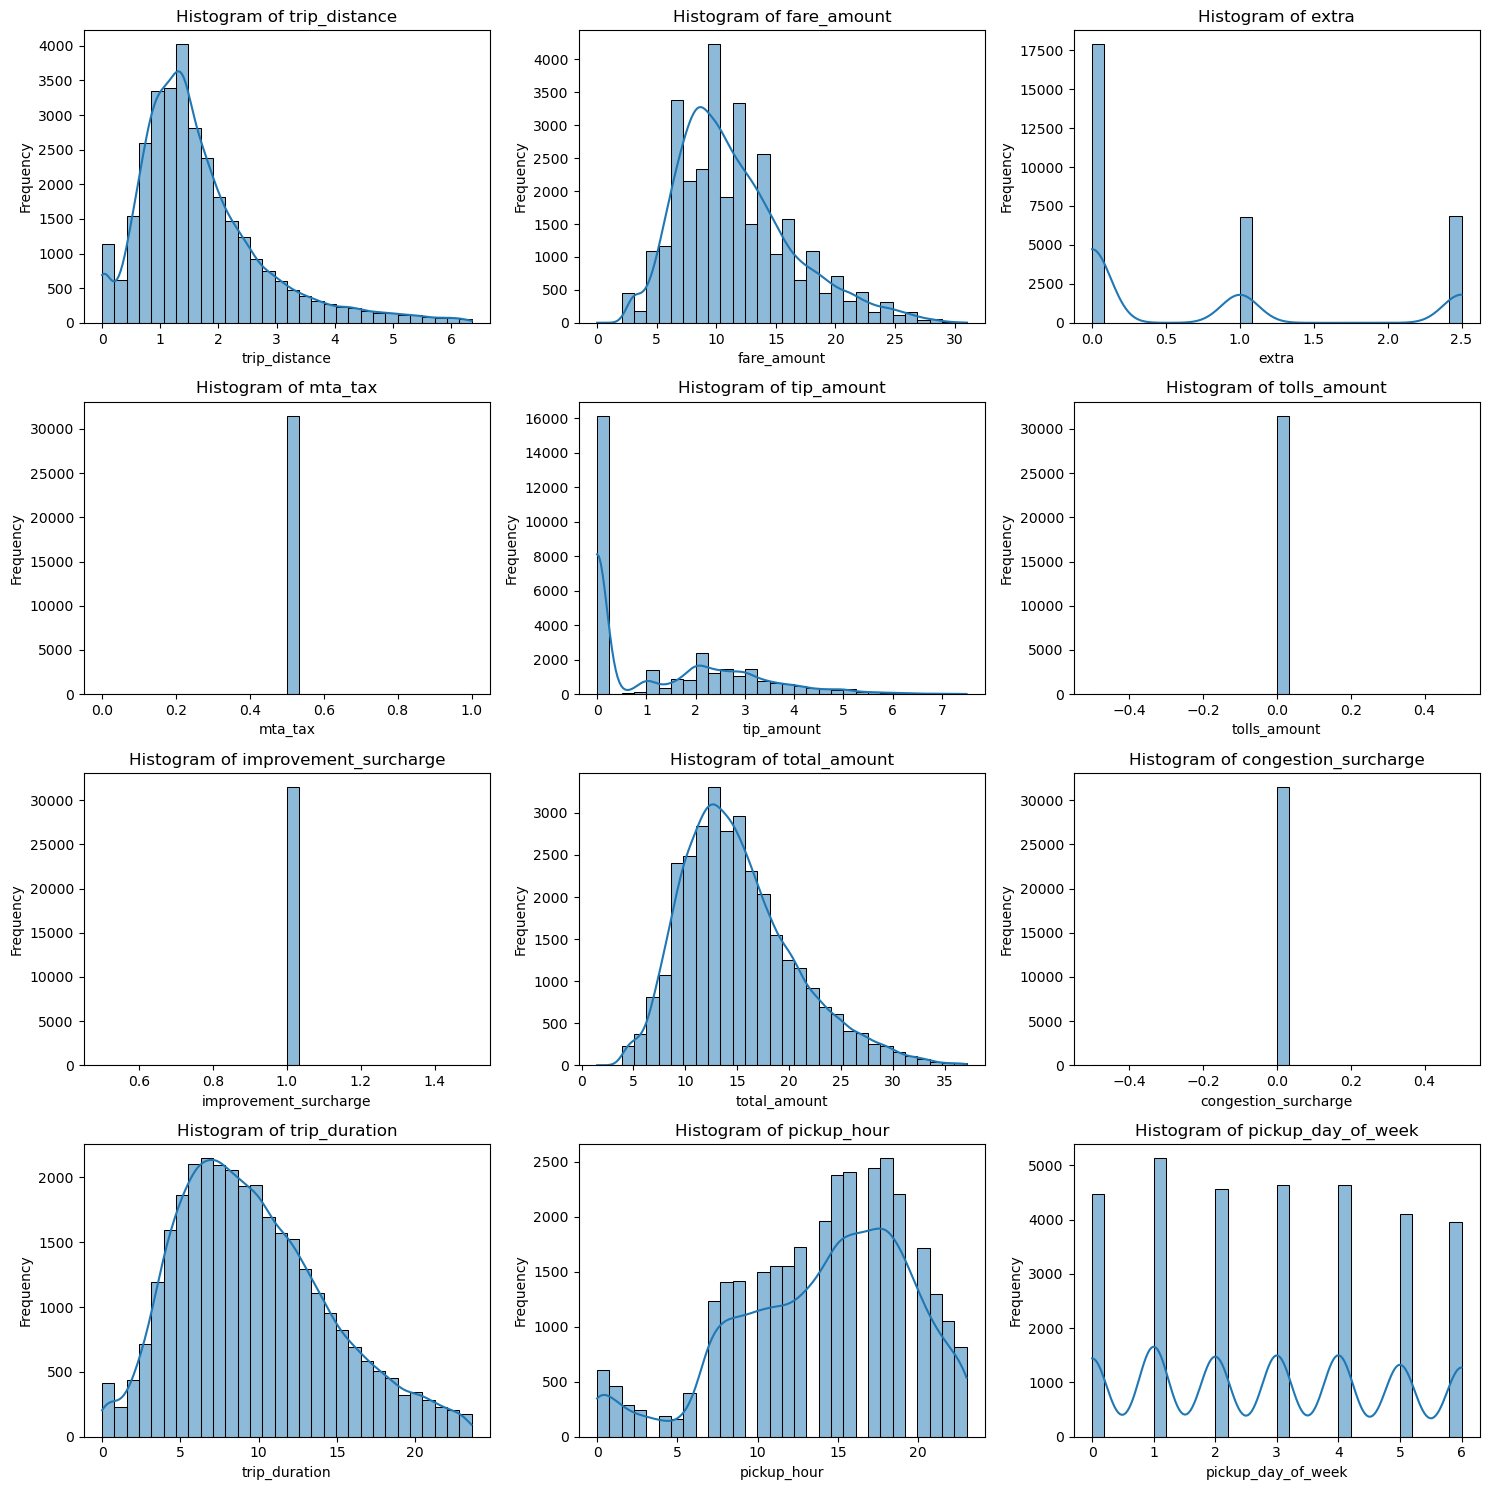

In [670]:
# List of columns to plot
columns = [
    'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
    'tolls_amount', 'improvement_surcharge', 'total_amount',
    'congestion_surcharge', 'trip_duration', 'pickup_hour',
    'pickup_day_of_week', 'pickup_month'
]

# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

# Loop through each column and create a histogram
for ax, column in zip(axes, columns):
    sns.histplot(df[column], bins=30, kde=True, ax=ax)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()  # Adjust layout
plt.show()  # Show the plot

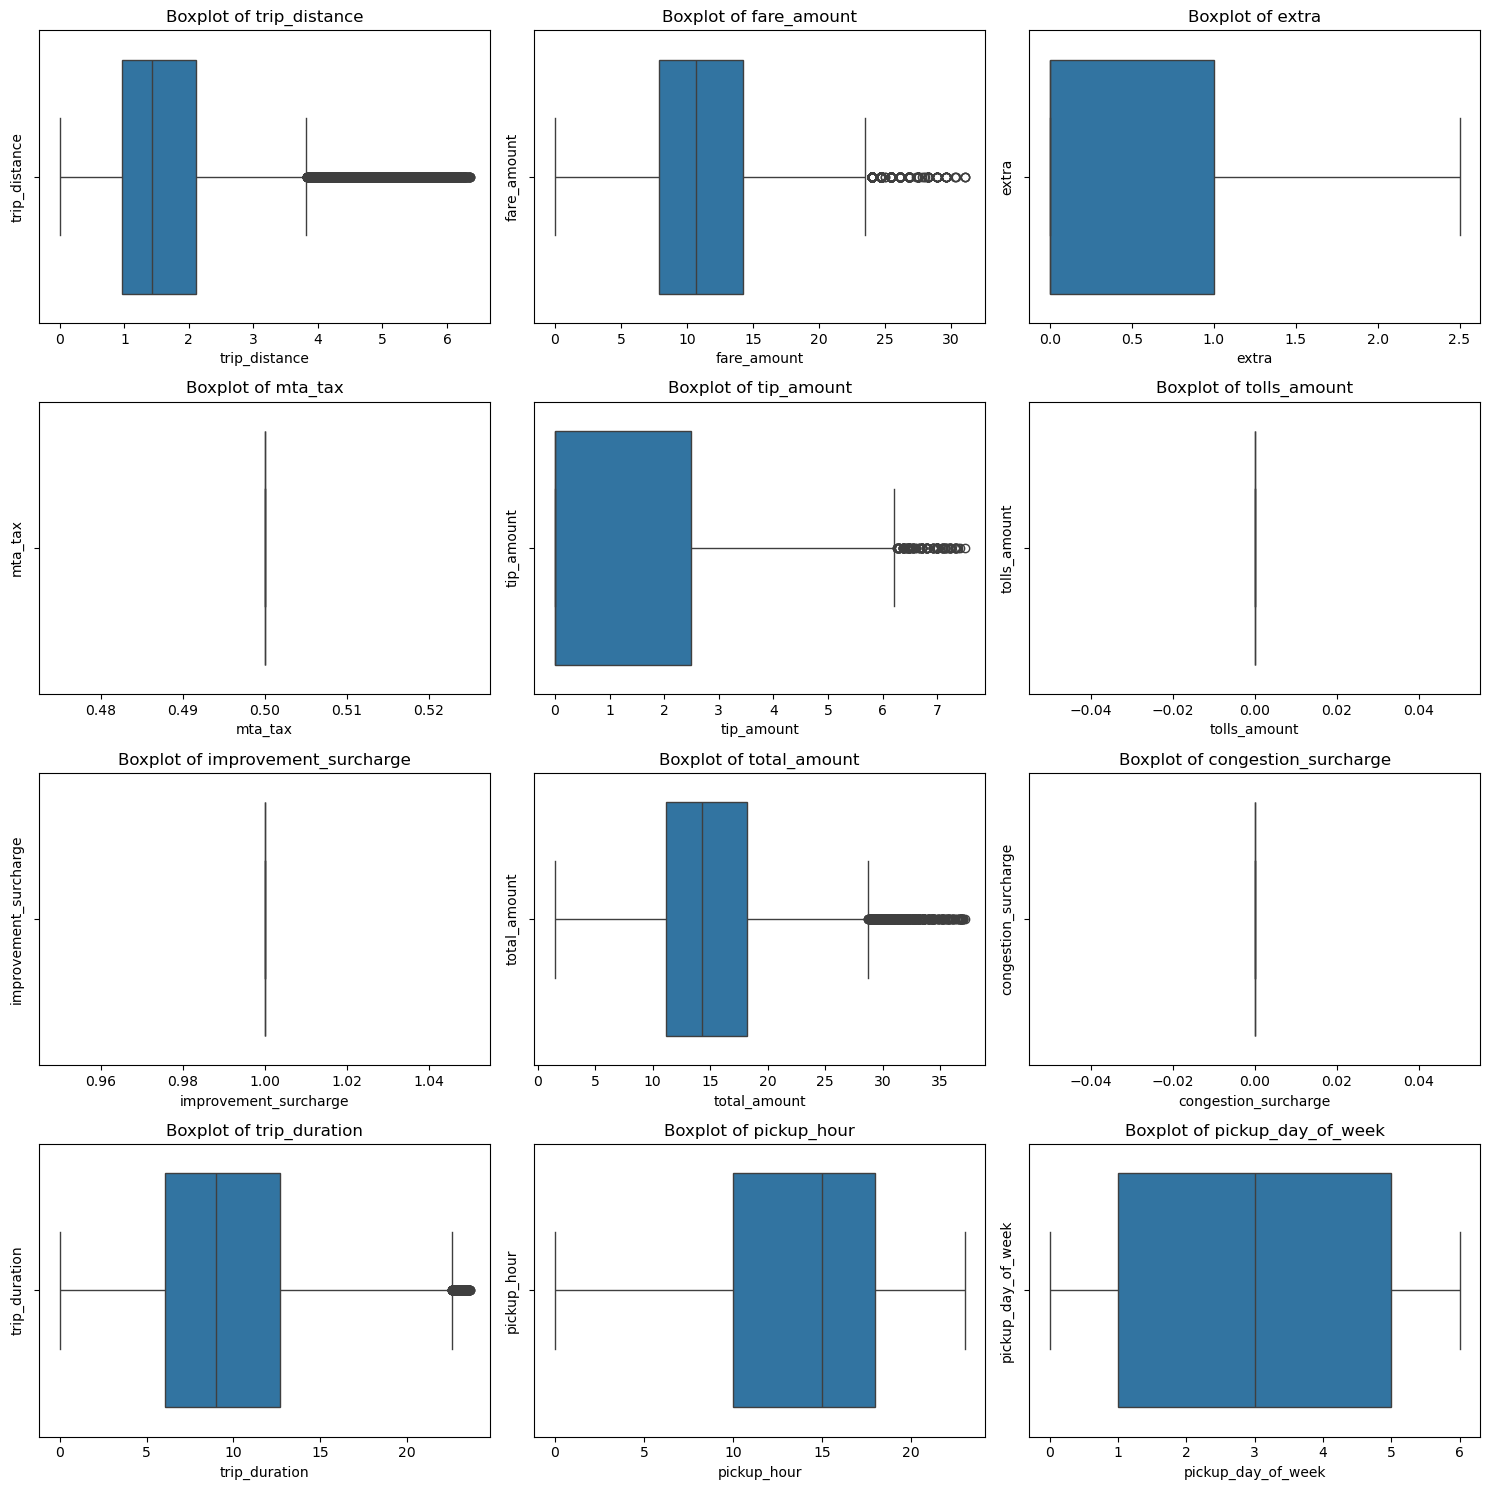

In [671]:
# List of columns to plot
columns = [
    'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
    'tolls_amount', 'improvement_surcharge', 'total_amount',
    'congestion_surcharge', 'trip_duration', 'pickup_hour',
    'pickup_day_of_week', 'pickup_month'
]

# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

# Loop through each column and create a boxplot
for ax, column in zip(axes, columns):
    sns.boxplot(df[column], ax=ax, orient="h")
    ax.set_title(f'Boxplot of {column}')
    ax.set_ylabel(column)

plt.tight_layout()  # Adjust layout
plt.show()  # Show the plot


In [677]:
results = []
for column in columns:
    if column in df.columns:
        # Calculate statistics
        q1 = df[column].quantile(0.25)
        q2 = df[column].quantile(0.50)  # Median
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        skewness = df[column].skew()
        kurt = df[column].kurtosis()

        # Determine skewness direction
        skewness_type = "Normal"
        if skewness < 0:
            skewness_type = "Left Skewed"
        elif skewness > 0:
            skewness_type = "Right Skewed"

        # Determine kurtosis type
        if kurt < 0:
            kurtosis_type = "Platykurtic"
        elif kurt > 0:
            kurtosis_type = "Leptokurtic"
        else:
            kurtosis_type = "Mesokurtic"

        results.append([column,skewness_type,kurtosis_type,q1,q2,q3,iqr,lower_bound,upper_bound])

visual_results = pd.DataFrame(results, columns=["column","skewness_type","kurtosis_type","q1","q2","q3","iqr","lower_bound","upper_bound"])
visual_results

,column,skewness_type,kurtosis_type,q1,q2,q3,iqr,lower_bound,upper_bound
0,passenger_count,Right Skewed,Leptokurtic,1.00,1.00,1.00,0.00,1.00,1.00
1,trip_distance,Right Skewed,Leptokurtic,0.97,1.43,2.11,1.14,-0.74,3.82
2,fare_amount,Right Skewed,Leptokurtic,7.90,10.70,14.20,6.30,-1.55,23.65
3,extra,Right Skewed,Platykurtic,0.00,0.00,1.00,1.00,-1.50,2.50
4,mta_tax,Normal,Mesokurtic,0.50,0.50,0.50,0.00,0.50,0.50
5,tip_amount,Right Skewed,Platykurtic,0.00,0.00,2.50,2.50,-3.75,6.25
6,tolls_amount,Normal,Mesokurtic,0.00,0.00,0.00,0.00,0.00,0.00
7,improvement_surcharge,Normal,Mesokurtic,1.00,1.00,1.00,0.00,1.00,1.00
8,total_amount,Right Skewed,Leptokurtic,11.20,14.30,18.20,7.00,0.70,28.70
9,congestion_surcharge,Normal,Mesokurtic,0.00,0.00,0.00,0.00,0.00,0.00


In [672]:
results = []

for column in df:
    if df[column].dtype in ["float64","int64", "int32"]:
        stats, pval = shapiro(df[column])
        results.append([column,stats,pval])

shapiro_df = pd.DataFrame(results, columns=["column", "statistic", "p_value"])
shapiro_df["alpha"] = 0.05
shapiro_df["reject_h0"] = shapiro_df["p_value"] <= shapiro_df["alpha"]

c:\Users\User\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 31522.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\User\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


In [673]:
shapiro_df

,column,statistic,p_value,alpha,reject_h0
0,passenger_count,0.378396,2.857134e-135,0.05,True
1,trip_distance,0.898353,4.357196e-87,0.05,True
2,fare_amount,0.949416,2.190953e-71,0.05,True
3,extra,0.697486,8.057326e-115,0.05,True
4,mta_tax,1.000000,1.000000e+00,0.05,False
5,tip_amount,0.804590,3.070620e-103,0.05,True
6,tolls_amount,1.000000,1.000000e+00,0.05,False
7,improvement_surcharge,1.000000,1.000000e+00,0.05,False
8,total_amount,0.961921,1.876401e-65,0.05,True
9,congestion_surcharge,1.000000,1.000000e+00,0.05,False


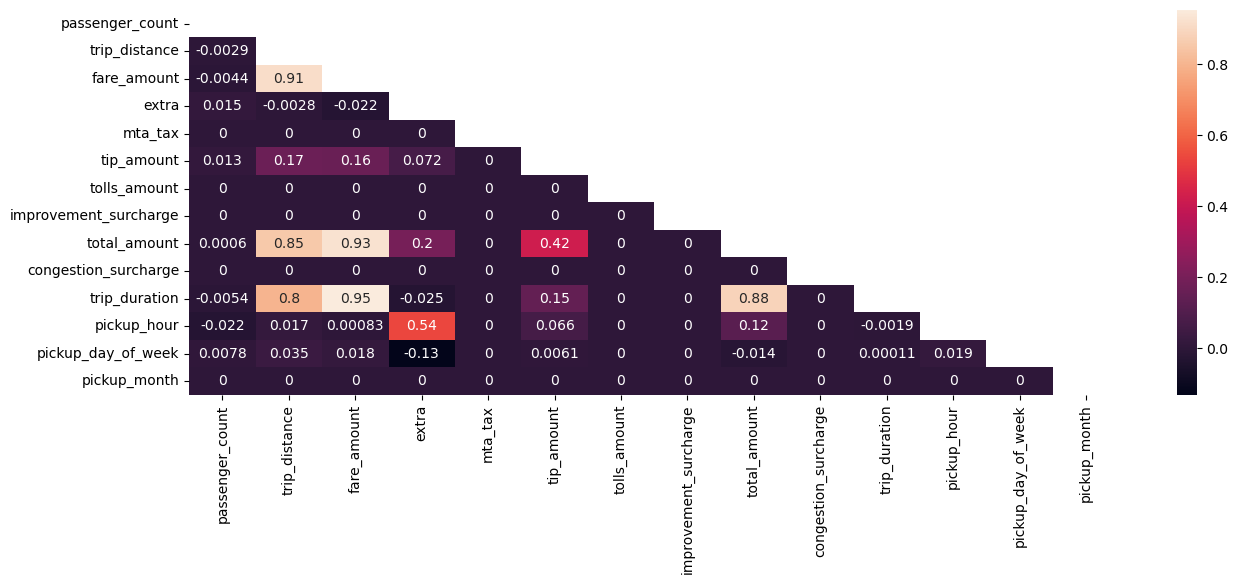

In [674]:
spearman_matrix = df.corr(numeric_only=True, method="spearman").fillna(0)
mask = np.triu(np.ones_like(spearman_matrix)) 
plt.figure(figsize=(15,5))
corr_map = sns.heatmap(spearman_matrix, annot=True, mask=mask) 
plt.show(corr_map)

In [675]:
columns = [column for column in df if df[column].dtype in ["float64", "int64", "int32"]]
results = []
for length in columns:
    for width in columns:
        stats, pval = spearmanr(df[length], df[width])
        results.append([length, width, stats])

spearman_df = pd.DataFrame(results, columns=["col_1", "col_2", "correlation_value"]).fillna(0)
spearman_df = spearman_df[spearman_df["col_2"] != spearman_df ["col_1"]]
spearman_df = spearman_df.sort_values(by="correlation_value",ascending=False).reset_index().drop(columns=["index"])
spearman_df["odd_even"] = spearman_df.index % 2
spearman_df = spearman_df[spearman_df["odd_even"]==0]
spearman_df = spearman_df.drop(columns=["odd_even"])

C:\Users\User\AppData\Local\Temp\ipykernel_24968\2292687276.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  stats, pval = spearmanr(df[length], df[width])


In [676]:
spearman_df["direction"] = spearman_df["correlation_value"].apply(lambda x: "Directly Proportional" if x>0 else "Inversely Proportional" if x<0 else "Neutral")
spearman_df["correlation_power"] = spearman_df["correlation_value"].apply(lambda x: "Neutral" if x==0 else "Strong" if 0.7<=x<=1 else "Moderate" if 0.3<=x<0.7 else "Weak")

In [683]:
spearman_df = spearman_df[spearman_df["correlation_value"]!=0]
spearman_df

,col_1,col_2,correlation_value,direction,correlation_power
0,fare_amount,trip_duration,0.954217,Directly Proportional,Strong
2,total_amount,fare_amount,0.928147,Directly Proportional,Strong
4,trip_distance,fare_amount,0.912229,Directly Proportional,Strong
6,trip_duration,total_amount,0.882398,Directly Proportional,Strong
8,total_amount,trip_distance,0.853963,Directly Proportional,Strong
10,trip_duration,trip_distance,0.801115,Directly Proportional,Strong
12,pickup_hour,extra,0.536107,Directly Proportional,Moderate
14,tip_amount,total_amount,0.420109,Directly Proportional,Moderate
16,extra,total_amount,0.195589,Directly Proportional,Weak
18,trip_distance,tip_amount,0.167593,Directly Proportional,Weak
